# Assignment
*  In this assignment, we will build a classifier for MNIST from scratch using just [NumPy](https://numpy.org/)

*  [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits of size 28x28

*  The dataset that you are expected to use for training is already uploaded along

*   Our model will have 1 hidden layer, like the one below (not our recommendation to use 256 in the hidden layer though, try various values out)

**Feel free to redefine any function signatures below, just make sure the final cell remains the same.**

<center>
<img src="https://user-images.githubusercontent.com/81357954/166119893-4ca347b8-b1a4-40b8-9e0a-2e92b5f164ae.png">
</center>

## Import libraries here
NumPy, Matplotlib, ...

Also remember to initialize the seed for reproducibility of results

In [55]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
import random

## Load *Dataset*
Load data from the given pickle file

In [56]:

data_file="MNIST_data.pkl"
# load the data set
with open(data_file,'rb') as infile:
    train_dataset = pickle.load(infile)
X = train_dataset['X']
y = train_dataset['y']

# normalize
stdev=np.std(X,axis=0,keepdims=True)
Mean=np.mean(X,axis=0,keepdims=True)
Normalised_X=(X-Mean)/(stdev+1e-7)
X=Normalised_X
# Split into X_train, y_train, X_test, y_test
# you can use stratified splitting from sklearn library

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.5)                                           



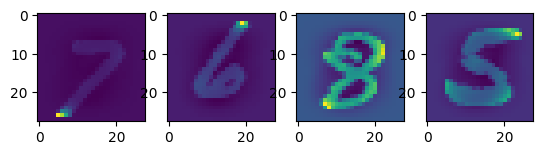

          19883          1170            19044            22323


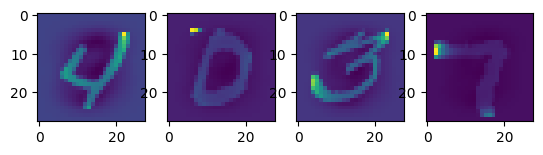

          5189          14112            20921            12895


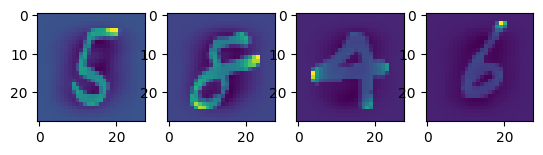

          26334          23691            28188            16681


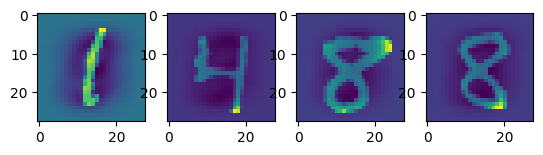

          12191          17831            14576            16451


In [57]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding labels
a=np.arange(0,16)
for i in range(0,16):
    if(i%4==0):f, axis = plt.subplots(1, 4)
    a[i]=random.randint(0,30000)
    b=X_train[a[i]]
    axis[i%4].imshow(b.reshape(28,28))
    if(i%4==3):
        plt.show()
        print("         ",a[i-3],"        ",a[i-2],"          ",a[i-1],"          ",a[i])
    

## Building up parts of our classifier

**Activation functions**

In [58]:
def relu(z):
    """
    Arguments:
    z -- A scalar or numpy array.
    Return:
    relu func applied to each element of z
    """
    return (np.maximum(0,z))
def softmax(z):
    """
    returns computed probabilitites for each element in batch separately
    input: (N, 10)
    output: (N, 10)
    """
    reduced=z-np.max(z,axis=1,keepdims=True)
    exped=np.exp(reduced)
    den=np.sum(exped,axis=1,keepdims=True)
    
    return exped/den



**Notes about the Neural Network** 
*   Input size is (784,) because 28x28 = 784
*   Output size will be 10, each element represeting probability of the image representing that digit
*   Size of the hidden layer is a hyperparameter



**Initialize the layers weights**

Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero. But you can try everything out :)

In [59]:
def init_params(layer_1, hidden_layer, layer_2):
    """
    ideally it should take the size of all the layers and 
    should return the initialized weights.
    """
    N=30000
    np.random.seed(1)
    w1=0.1*np.random.randn(layer_1,hidden_layer)
    np.random.seed(2)
    w2=0.1*np.random.randn(hidden_layer,layer_2)
    #for i in (0,784,1):
    #    for j in (0,256,1):
    #        w1[i,j]=0.001*random.randint(0,1000)
    #for i in (hidden_layer):
    #    for j in (layer_2):
    #        w2[i][j]=0.001*random.randint(0,1000)
    b1=np.zeros((hidden_layer,1))
    b2=np.zeros((layer_2,1))
    w1,b1,w2,b2
    return w1,b1,w2,b2
    #y_hat=np.matmul(w,x)+b

**Forward Propagation**

In [60]:
def forward_propg(X, w1, w2, b1, b2):
    """
    X: input data
    returns: logits, output of each layer z1,z2,a1,a2
    """
    #here X will be X train and its dimensions are N*784, dimensions of w1 are 784*256, dimensions of b1 are N*1
    #then dimensions of z1 are N*256 and z2 are N*10. w2 will have 256*10 and z1*w2 will have N*10. 
    z1=np.matmul(X,w1)
    z1=np.transpose(z1.transpose()+b1)
    a1=relu(z1)
    z2=np.matmul(a1,w2)
    z2=np.transpose(z2.transpose()+b2)
    #print(z2)
    a2=softmax(z2)
    #print(a2)
    return z1, z2, a1, a2
    

**Backward Propagation**


You may use stochastic gradient descent or batch gradient descent here. Feel free to use any loss function.

In [61]:
def backward_propg(layer_1,hidden_layer,layer_2, w1, b1, w2, b2, X, y, z1, z2, a1, a2,lr ):#"""output of forward propg"""
    """
    should update the weights and return updated weights
    """
    N=30000
    del_L_z2=np.divide(a2,N)
    for i in range(0,N,1):
        del_L_z2[i][y[i]]-=1/N
    del_L_w2=np.matmul(a1.transpose(),del_L_z2)
    del_L_a1=np.matmul(del_L_z2,w2.transpose())
    
    
    #dimensions of z2 are N,10 and that of b2 are N,1
    #print(del_L_z2.shape)
    del_L_b2=np.zeros((layer_2,1))
    
    '''del_L_z2=del_L_z2.transpose()
    for i in range (0,10,1):
        t=del_L_z2[i]
        del_L_b2=np.sum(t)
    del_L_z2=del_L_z2.transpose()'''
    del_L_b2=np.sum(del_L_z2,axis=0,keepdims=True)
    del_L_b2=del_L_b2.transpose()
    #a1=relu(z1)
    #del by z1=del by a1 (where a1[i][j]>0)
    
    m,n=a1.shape
    del_L_z1=np.zeros((m,n))
    '''for i in range(m):
        for j in range(n):
            if(a1[i][j]>0):del_L_z1[i][j]=del_L_a1[i][j]'''
    
    del_L_z1=np.maximum(0,del_L_a1)
    
    del_L_b1=np.zeros((hidden_layer,1))
    del_L_b1=np.sum(del_L_z1,axis=0,keepdims=True)
    del_L_b1=del_L_b1.transpose()
        
    del_L_w1=np.matmul(X.transpose(),del_L_z1)
    #print(del_L_w1.shape)
    #doubt in del_by_b1 and del_by_b2
    
    #updates
    w1=w1 - lr*del_L_w1
    w2=w2 - lr*del_L_w2
    #print(b1.shape)
    #print(del_L_b1.shape)
    b1=b1 - lr*(del_L_b1)
    b2=b2 - lr*(del_L_b2)
    return w1,b1,w2,b2

In [62]:
def cost_func(a2,y):
    """
    calculate loss to check whether it is decreasing at each epoch or not
    one can return this in backward propagation as well
    """
    N=30000
    l=np.zeros((N,))
    for i in range(N):
        l[i]=-math.log(a2[i][y[i]]+1e-4)
    L=np.mean(l)
    return L


## Integrate everything

In [70]:
def train(X, y, hidden_nodes, epochs=1000, lr=3*(1e-3)):
    """
    hidden_nodes: no. of nodes in hidden layer

    should return the updated optimize weights.
    """
    layer_1=784
    hidden_layer=256
    layer_2=10
    # initialize weights.
    
    w1,b1,w2,b2=init_params(layer_1,hidden_layer,layer_2)
    k=list()
    f=list()
    for i in range(epochs):
        #print(w1)
        # forward propagation
        z1,z2,a1,a2=forward_propg(X, w1, w2, b1, b2)
        
        # print cost at every 100 or so iterations
        
        # backward propagation
        w1,b1,w2,b2=backward_propg(layer_1,hidden_layer,layer_2,w1, b1, w2, b2, X, y, z1, z2, a1, a2,lr )
        L=cost_func(a2,y)
        k.append(L)
        if(i%100==0 or i==999):print(L)
        f.append(i/10)
    plt.plot(f,k)
    plt.show()
    return w1,b1,w2,b2

4.784650111510848
1.858330279977999
1.2632241840366976
1.0120770370134238
0.8730471600357895
0.784144984567561
0.721934421585534
0.6757538500659643
0.6398726309342334
0.6108938153807714
0.5870302248032019


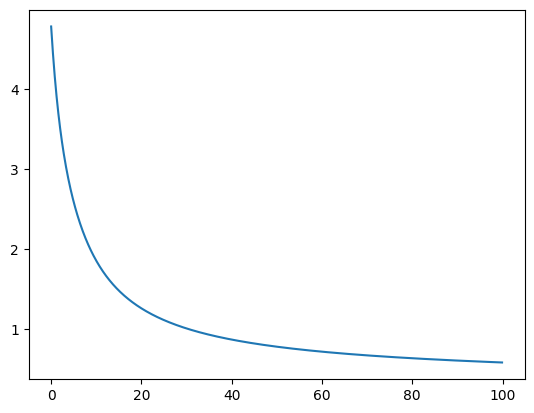

In [71]:
fw1,fb1,fw2,fb2=train(X_train,y_train,256,1000,3*(1e-3))

In [72]:
def predict(X, w1,b1,w2,b2):
    """
    returns the prediction in [0,9] for each element in X
    """
    z1=np.matmul(X,w1)
    z1=np.transpose(z1.transpose()+b1)
    a1=relu(z1)
    z2=np.matmul(a1,w2)
    z2=np.transpose(z2.transpose()+b2)
    #print(z2)
    a2=softmax(z2)
    y_predict=np.zeros((30000,1))
    for i in range(0,30000,1):
        j=a2[i].argmax()
        y_predict[i][0]=j
    return y_predict

In [73]:
def accuracy(y_predict, y):
    """
    prints % accuracy
    """
    t=0
    for i in range(0,30000):
        if(y_predict[i]==y[i]):t+=1
    return t/300    

In [74]:
y_predict=predict(X_test,fw1,fb1,fw2,fb2)

In [75]:
acc=accuracy(y_predict,y_test)
print(acc)

82.42


In [76]:
print(y_predict)

[[7.]
 [9.]
 [2.]
 ...
 [3.]
 [6.]
 [1.]]


### Save as pickle

In [ ]:
import pickle
import random

roll_num = "22b0396" # enter ldap
hidden_dim =256 # replace with your own hidden dimension

model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': fw1, # layer 0 weight (784, z)
    'layer_0_bias': fb1, # layer 0 bias (z, 1)
    'layer_1_wt': fw2, # layer 1 weight (z, 10)
    'layer_1_bias': fb2 # layer 1 bias (10, 1)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (hidden_dim, 1)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (10, 1)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)